<a href="https://colab.research.google.com/github/Lexiusleeah/Capstone-Lynch/blob/main/CapstoneLynch1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### The data consist of 3k PBMCs from a Healthy Donor and are freely available from 10x Genomics
Preprocessing and clustering 3k PBMCs

Run the following to download and unpack the data.
The last line creates a directory for writing processed data.

# Goal :
### modularized pipeline - /// type annotation to identify genes in HIV patients suffering from dementia
### 1. preprocessing and 2. normalization under one function - two functions - can have smaller functions
### Software Engineering
### Try diff software besides kaggle/ co-lab

In [19]:
!mkdir data
!wget http://cf.10xgenomics.com/samples/cell-exp/1.1.0/pbmc3k/pbmc3k_filtered_gene_bc_matrices.tar.gz -O data/pbmc3k_filtered_gene_bc_matrices.tar.gz
!cd data; tar -xzf pbmc3k_filtered_gene_bc_matrices.tar.gz
!mkdir write

--2024-03-08 18:02:16--  http://cf.10xgenomics.com/samples/cell-exp/1.1.0/pbmc3k/pbmc3k_filtered_gene_bc_matrices.tar.gz
Resolving cf.10xgenomics.com (cf.10xgenomics.com)... 104.18.1.173, 104.18.0.173, 2606:4700::6812:1ad, ...
Connecting to cf.10xgenomics.com (cf.10xgenomics.com)|104.18.1.173|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://cf.10xgenomics.com/samples/cell-exp/1.1.0/pbmc3k/pbmc3k_filtered_gene_bc_matrices.tar.gz [following]
--2024-03-08 18:02:16--  https://cf.10xgenomics.com/samples/cell-exp/1.1.0/pbmc3k/pbmc3k_filtered_gene_bc_matrices.tar.gz
Connecting to cf.10xgenomics.com (cf.10xgenomics.com)|104.18.1.173|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7621991 (7.3M) [application/x-tar]
Saving to: ‘data/pbmc3k_filtered_gene_bc_matrices.tar.gz’

data/pbmc3k_filtere 100%[===================>]   7.27M  --.-KB/s    in 0.1s    

2024-03-08 18:02:16 (72.6 MB/s) - ‘data/pbmc3k_filtered_gene_bc_matri

In [48]:
pip install leidenalg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 25.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 78.6 MB/s eta 0:00:00


In [20]:
pip install scanpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 26.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.0/121.0 kB 12.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 11.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 kB 12.1 MB/s eta 0:00:00
  Created wheel for umap-learn: filename=umap_learn-0.5.5-py3-none-any.whl size=86832 sha256=26d880ce53353d0acdc13212c2c9749765688c4bc030ad8601eee0b1dad4aa0f
  Stored in directory: /root/.cache/pip/wheels/3a/70/07/428d2b58660a1a3b431db59b806a10da736612ebbc66c1bcc5
  Created wheel for session-info: filename=session_info-1.0.0-py3-none-any.whl size=8027 sha256=b03089d95c14f976490cc499530b7c244a82b114eab19778ee3961eb2e071409
  Stored in directory: /root/.cache/pip/wheels/6a/aa/b9/eb5d4031476ec10802795b97ccf937b9

In [21]:
pip install scanorama bbknn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 647.5/647.5 kB 7.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for annoy: filename=annoy-1.17.3-cp310-cp310-linux_x86_64.whl size=552449 sha256=616698b5abfe7eafd98f841e2607507e59d4960b16cc3d8123e81e2907d1c8fa
  Stored in directory: /root/.cache/pip/wheels/64/8a/da/f714bcf46c5efdcfcac0559e63370c21abe961c48e3992465a
  Created wheel for fbpca: filename=fbpca-1.0-py3-none-any.whl size=11373 sha256=e9b6e77b3763d90c2ded1fe7f0d18aeed2afa985f6cbda588f1e03ba4dea0a7c
  Stored in directory: /root/.cache/pip/wheels/3c/ea/60/8d1c9fbbc99492a1775b36a5e29c8c1ef309cc5821bd5a219d
  Created wheel for intervaltree: filename=intervaltree-3.1.0-py2.py3-none-any.whl size=26095 sha256=7a790f0326d875de167a0354041cc4af8b34d0e8c8974764c92550e3b2dee452
  Stored in directory: /root/.cache/pip/wheels/fa/80/8c/43488a924a046b733b64de3fac99252674c892a4c3801c0a61


In [ ]:
pip install scrublet


In [ ]:
pip install scikit-learn

In [22]:
import pandas as pd
import scanpy as sc
import anndata as ann
import numpy as np
import scipy as sp


In [23]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')

scanpy==1.9.8 anndata==0.10.5.post1 umap==0.5.5 numpy==1.25.2 scipy==1.11.4 pandas==1.5.3 scikit-learn==1.2.2 statsmodels==0.14.1 pynndescent==0.5.11


In [24]:
results_file = 'write/pbmc3k.h5ad'  # the file that will store the analysis results
adata = sc.read_10x_mtx(
    'data/filtered_gene_bc_matrices/hg19/',  # the directory with the `.mtx` file
    var_names='gene_symbols',                # use gene symbols for the variable names (variables-axis index)
    cache=True)                              # write a cache file for faster subsequent reading

... writing an h5ad cache file to speedup reading next time


Create a function to read the file

In [ ]:
# Open the file
file = open('example.txt', 'r')

# Read the file
content = file.read()

# Print the content
print(content)

# Close the file
file.close()


In [57]:
# data_path = '/Users/lexius/Downloads/filtered_gene_bc_matrices/hg19'

In [61]:
def load_data(data_path):
  results_file = [] # the file that will store the analysis result
  try:
    return sc.read_10x_mtx(data_path, var_names = 'gene_symbols', cache=True)
  except FileNotFoundError:
      print(f"File not found: {data_path}")
  """
  Load dataset from a file into a dataframe, add variable names(variable-axis index) and write a cache file for faster subsequent reading
  Args:
    data_path(str): The file path to the dataset
  Returns:
    DataFrame: The loaded dataset.
  """
  return adata #df turns into adata?



In [62]:
adata # given the wrong dimension 2700 × 32738

AnnData object with n_obs × n_vars = 2638 × 1868
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg', 'pca', 'neighbors'
    obsm: 'X_pca'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

Create a function to preprocess

In [51]:
def clean_filter_cells():
  sc.pp.filter_cells(adata, min_genes=200)
  sc.pp.filter_genes(adata, min_cells=3)

  """
  Filter the input dataset by removing cells with less than 200 genes expressed and remove genes expressed in less than 3 cells
  Args:
    df(data frame adata): The adata
  Returns:
    DataFrame: The filtered out 19024 genes that are detected in less than 3 cells.
  """
  def remove_mt_genes():
    """Remove the group of mitochondrial genes as 'mt' """
    adata.var['mt'] = adata.var_names.str.startswith('MT-')
    sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

  def slice_mt_genes():
    """slicing removes gene less than 2500. So from 2500 to the end """
    adata = adata[adata.obs.n_genes_by_counts < 2500, :]
    """This slicing removes mitochondrial percentage 5% or less. 5 and above  """
    adata = adata[adata.obs.pct_counts_mt < 5, :]
  def cell_normalization():
    sc.pp.normalize_total(adata, target_sum=1e4)
  return adata

Part 2

In [53]:
 # Logarithmize the data:

sc.pp.log1p(adata)
# Identify highly-variable genes.


/usr/local/lib/python3.10/dist-packages/scanpy/preprocessing/_simple.py:351: RuntimeWarning: invalid value encountered in log1p
  np.log1p(X, out=X)


In [54]:
adata = adata[:, adata.var.highly_variable]
sc.pp.regress_out(adata, ['total_counts', 'pct_counts_mt'])


regressing out ['total_counts', 'pct_counts_mt']


ValueError: The first guess on the deviance function returned a nan.  This could be a boundary  problem and should be reported.

In [42]:
# Scale each gene to unit variance. Clip values exceeding standard deviation 10.
sc.pp.scale(adata, max_value=10)

PCA

In [43]:
sc.tl.pca(adata, svd_solver='arpack')

computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:01)


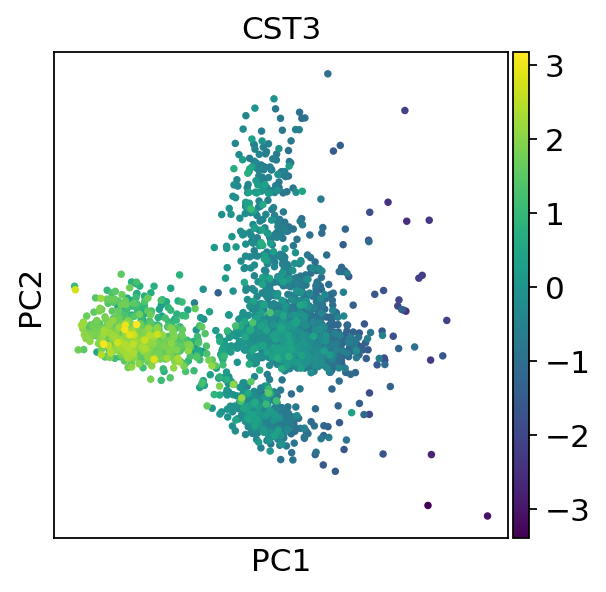

In [44]:
sc.pl.pca(adata, color='CST3')


In [45]:
# Computing the neighborhood graph
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)


computing neighbors
    using 'X_pca' with n_pcs = 40
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:03)


In [46]:
#Clustering the neighborhood graph
sc.tl.leiden(adata)
#will give you clusters

ImportError: Please install the leiden algorithm: `conda install -c conda-forge leidenalg` or `pip3 install leidenalg`.